# Partial Dependence for 2 Features Explainer Demo

This example demonstrates how to interpret a model using the H2O Sonar library and retrieve the data and **partial dependence plot for 2 featues**.

In [1]:
import logging
import os

import daimojo
import datatable
import webbrowser

from h2o_sonar import interpret
from h2o_sonar.lib.api import commons, explainers
from h2o_sonar.lib.api.models import ModelApi
from h2o_sonar.explainers.pd_2_features_explainer import PdFor2FeaturesExplainer

In [2]:
# dataset
dataset_path = "../../data/creditcard.csv"
target_col = "default payment next month"

# model
mojo_path = "../../data/models/creditcard-binomial.mojo"
mojo_model = daimojo.model(mojo_path)
model = ModelApi().create_model(
    model_src=mojo_model,
    target_col=target_col,
    used_features=list(mojo_model.feature_names),
)

# results
results_location = "./results"
os.makedirs(results_location, exist_ok=True)

In [3]:
# explainer description
interpret.describe_explainer(PdFor2FeaturesExplainer)

{'id': 'h2o_sonar.explainers.pd_2_features_explainer.PdFor2FeaturesExplainer',
 'name': 'PdFor2FeaturesExplainer',
 'display_name': 'Partial Dependence Plot for Two Features',
 'description': 'Partial dependence for 2 features portrays the average\nprediction behavior of a model across the domains of two input variables\ni.e. interaction of feature tuples with the prediction. While PD for one feature\nproduces 2D plot, PD for two features produces 3D plots. This explainer plots PD for\ntwo features using heatmap, contour 3D or surface 3D.\n',
 'model_types': ['iid', 'time_series'],
 'can_explain': ['regression', 'binomial'],
 'explanation_scopes': ['global_scope'],
 'explanations': [{'explanation_type': 'global-partial-dependence',
   'name': 'PartialDependenceExplanation',
   'category': None,
   'scope': 'global',
   'has_local': None,
   'formats': []}],
 'parameters': [{'name': 'sample_size',
   'description': 'Sample size for Partial Dependence Plot of 2 features.',
   'comment': 

## Interpretation

In [4]:
interpretation = interpret.run_interpretation(
    dataset=dataset_path,
    model=model,
    target_col=target_col,
    results_location=results_location,
    log_level=logging.INFO,
    explainers=[
        commons.ExplainerToRun(
            explainer_id=PdFor2FeaturesExplainer.explainer_id(),
            params="",
        )
    ]
)

/home/srasaratnam/projects/h2o-sonar/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


h2o_sonar.explainers.pd_2_features_explainer.PdFor2FeaturesExplainer: progress 10.0%
h2o_sonar.explainers.pd_2_features_explainer.PdFor2FeaturesExplainer: progress 10.0%
h2o_sonar.explainers.pd_2_features_explainer.PdFor2FeaturesExplainer: progress 10.0%
h2o_sonar.explainers.pd_2_features_explainer.PdFor2FeaturesExplainer: progress 10.0%
h2o_sonar.explainers.pd_2_features_explainer.PdFor2FeaturesExplainer: progress 20.0%
h2o_sonar.explainers.pd_2_features_explainer.PdFor2FeaturesExplainer: progress 20.0%
h2o_sonar.explainers.pd_2_features_explainer.PdFor2FeaturesExplainer: progress 20.0%
h2o_sonar.explainers.pd_2_features_explainer.PdFor2FeaturesExplainer: progress 20.0%
h2o_sonar.explainers.pd_2_features_explainer.PdFor2FeaturesExplainer: progress 20.0%
h2o_sonar.explainers.pd_2_features_explainer.PdFor2FeaturesExplainer: progress 20.0%
h2o_sonar.explainers.pd_2_features_explainer.PdFor2FeaturesExplainer: progress 20.0%
h2o_sonar.explainers.pd_2_features_explainer.PdFor2FeaturesExplai

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

## Explainer Result

In [5]:
# retrieve the result
result = interpretation.get_explainer_result(PdFor2FeaturesExplainer.explainer_id())

In [6]:
# open interpretation HTML report in web browser
webbrowser.open(interpretation.result.get_html_report_location())

True

In [7]:
# summary
result.summary()

{'id': 'h2o_sonar.explainers.pd_2_features_explainer.PdFor2FeaturesExplainer',
 'name': 'PdFor2FeaturesExplainer',
 'display_name': 'Partial Dependence Plot for Two Features',
 'description': 'Partial dependence for 2 features portrays the average\nprediction behavior of a model across the domains of two input variables\ni.e. interaction of feature tuples with the prediction. While PD for one feature\nproduces 2D plot, PD for two features produces 3D plots. This explainer plots PD for\ntwo features using heatmap, contour 3D or surface 3D.\n',
 'model_types': ['iid', 'time_series'],
 'can_explain': ['regression', 'binomial'],
 'explanation_scopes': ['global_scope'],
 'explanations': [{'explanation_type': 'global-report',
   'name': 'Partial Dependence Plot for Two Features',
   'category': 'DAI MODEL',
   'scope': 'global',
   'has_local': None,
   'formats': ['text/markdown']},
  {'explanation_type': 'global-3d-data',
   'name': 'Partial Dependence Plot for Two Features',
   'category'

In [8]:
# parameters
result.params()

{'sample_size': 25000,
 'max_features': 3,
 'features': None,
 'grid_resolution': 10,
 'oor_grid_resolution': 0,
 'quantile-bin-grid-resolution': 0,
 'plot_type': 'heatmap'}

### Display PD Data

In [9]:
result.data(feature_names="'LIMIT_BAL' and 'EDUCATION'")

{'10000': {'6': 0.2552240192890167,
  '5': 0.2552240192890167,
  '4': 0.25266972184181213,
  '3': 0.25266972184181213,
  '2': 0.2251938432455063,
  '1': 0.2251938432455063,
  '0': 0.2251938432455063},
 '208000': {'6': 0.21158096194267273,
  '5': 0.21158096194267273,
  '4': 0.20898468792438507,
  '3': 0.20898468792438507,
  '2': 0.17519091069698334,
  '1': 0.17519091069698334,
  '0': 0.17519091069698334},
 '307000': {'6': 0.20750007033348083,
  '5': 0.20750007033348083,
  '4': 0.20484082400798798,
  '3': 0.20484082400798798,
  '2': 0.17081709206104279,
  '1': 0.17081709206104279,
  '0': 0.17081709206104279},
 '406000': {'6': 0.20645806193351746,
  '5': 0.20645806193351746,
  '4': 0.2037988305091858,
  '3': 0.2037988305091858,
  '2': 0.17081709206104279,
  '1': 0.17081709206104279,
  '0': 0.17081709206104279},
 '505000': {'6': 0.20645806193351746,
  '5': 0.20645806193351746,
  '4': 0.2037988305091858,
  '3': 0.2037988305091858,
  '2': 0.17081709206104279,
  '1': 0.17081709206104279,
  '0

### Plot PD Data

FixedFormatter should only be used together with FixedLocator


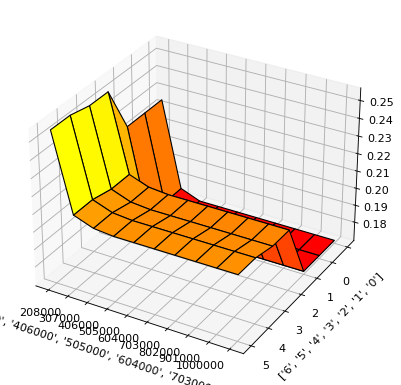

In [10]:
result.plot(feature_names="'LIMIT_BAL' and 'EDUCATION'")

### Save Explainer Log and Data

In [11]:
# save the explainer log
result.log(path="./pd-2-features-demo.log")

In [12]:
!head pd-ice-demo.log

2023-03-12 23:27:53,358 INFO PD/ICE a30a4f57-9c78-4c5f-9c8e-85198b523c1c/745668cc-bbc8-42be-9b39-47487112a885 BEGIN calculation
2023-03-12 23:27:53,359 INFO PD/ICE a30a4f57-9c78-4c5f-9c8e-85198b523c1c/745668cc-bbc8-42be-9b39-47487112a885 loading dataset
2023-03-12 23:27:53,360 INFO PD/ICE a30a4f57-9c78-4c5f-9c8e-85198b523c1c/745668cc-bbc8-42be-9b39-47487112a885 loaded dataset has 10000 rows and 25 columns
2023-03-12 23:27:53,360 INFO PD/ICE a30a4f57-9c78-4c5f-9c8e-85198b523c1c/745668cc-bbc8-42be-9b39-47487112a885 getting features list, importanceand metadata
2023-03-12 23:27:53,361 INFO PD/ICE a30a4f57-9c78-4c5f-9c8e-85198b523c1c/745668cc-bbc8-42be-9b39-47487112a885 all most important model features: ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
2023-03-12 23:27:53,362 INF

In [13]:
# save the explainer data
result.zip(file_path="./pd-ice-demo-archive.zip")

In [14]:
!unzip -l pd-ice-demo-archive.zip

Archive:  pd-ice-demo-archive.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
     4474  2023-03-12 23:35   explainer_h2o_sonar_explainers_pd_2_features_explainer_PdFor2FeaturesExplainer_993771ed-6505-450c-b5dd-4d81f871d218/result_descriptor.json
      122  2023-03-12 23:35   explainer_h2o_sonar_explainers_pd_2_features_explainer_PdFor2FeaturesExplainer_993771ed-6505-450c-b5dd-4d81f871d218/global_report/text_markdown.meta
     2642  2023-03-12 23:35   explainer_h2o_sonar_explainers_pd_2_features_explainer_PdFor2FeaturesExplainer_993771ed-6505-450c-b5dd-4d81f871d218/global_report/text_markdown/explanation.md
    92249  2023-03-12 23:35   explainer_h2o_sonar_explainers_pd_2_features_explainer_PdFor2FeaturesExplainer_993771ed-6505-450c-b5dd-4d81f871d218/global_report/text_markdown/image-1.png
    80252  2023-03-12 23:35   explainer_h2o_sonar_explainers_pd_2_features_explainer_PdFor2FeaturesExplainer_993771ed-6505-450c-b5dd-4d81f871d218/global_report/text_markdown